In [ ]:
#libraries needed to load images from a website and base64coding, install pyaes if necessary
#Code by: Oscar Camilo Pulido Peña
!pip install pyaes
import pyaes
import matplotlib.pyplot as plt
import cv2
import requests
import base64
import os

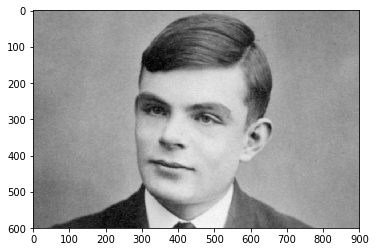

In [ ]:
#Step 1: charge image from website
#show petit prince before AES encrypt
#image is the byte representation of Alan Turing's image.

imageRoute = 'https://dam.muyinteresante.com.mx/wp-content/uploads/2019/07/alan.jpg'
imageBefore = requests.get(imageRoute).content
jpgBefore = open("petitPrinceBefore.jpg","wb")
jpgBefore.write(imageBefore)
jpgBefore.close()
petitPrinceBefore = cv2.imread("petitPrinceBefore.jpg")
plt.imshow(petitPrinceBefore)

In [ ]:
#Step2 cipher the image using pyaes
op = int(input ("Insert Operation mode...\n1.128 bits\n2.192 bits\n3.256 bits\n"))
if op == 1:
  key = os.urandom(16)
if op == 2:
  key = os.urandom(24)
if op == 3:
  key = os.urandom(32)    
data = pyaes.AESModeOfOperationCTR(key)
print("Byte representation of the image before AES cipher:")
print(imageBefore)
encrypted = data.encrypt(imageBefore)
print("Byte representation of the image after AES cipher:")
print(encrypted)

Insert Operation mode...
1.128 bits
2.192 bits
3.256 bits
3
Byte representation of the image before AES cipher:
b'\xff\xd8\xff\xe1\x00\xa4Exif\x00\x00II*\x00\x08\x00\x00\x00\x03\x001\x01\x02\x00 \x00\x00\x002\x00\x00\x002\x01\x02\x00\x1a\x00\x00\x00R\x00\x00\x00i\x87\x04\x00\x01\x00\x00\x00l\x00\x00\x00\x00\x00\x00\x00Adobe Photoshop CS6 (Macintosh)\x002019-07-15T17:41:57-05:00\x00\x03\x00\x00\x90\x07\x00\x04\x00\x00\x000220\x02\xa0\x04\x00\x01\x00\x00\x00\x84\x03\x00\x00\x03\xa0\x04\x00\x01\x00\x00\x00X\x02\x00\x00\x00\x00\x00\x00X\x02\x00\x00\x00\x00\xff\xec\x00\x11Ducky\x00\x01\x00\x04\x00\x00\x00<\x00\x00\xff\xe1\x03\xf3http://ns.adobe.com/xap/1.0/\x00<?xpacket begin="\xef\xbb\xbf" id="W5M0MpCehiHzreSzNTczkc9d"?> <x:xmpmeta xmlns:x="adobe:ns:meta/" x:xmptk="Adobe XMP Core 5.3-c011 66.145661, 2012/02/06-14:56:27        "> <rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"> <rdf:Description rdf:about="" xmlns:xmp="http://ns.adobe.com/xap/1.0/" xmlns:dc="http://purl.org/

In [ ]:
#Step 3 encoding in base64 encrypted byte representation of the image
encoded64 = base64.b64encode(encrypted)
print("Byte representation encoded in base64 of the image after AES cipher:")
print(encoded64)

Byte representation encoded in base64 of the image after AES cipher:
b'+DzOaXtczru1ziq0hYly+BrvJecfi0okZiZDASHN6SvXmpdTQ+cxfcJ+LN82a6JzIELp1m5oJIsThQztX5cGPZPtoSXaIhIsNuVLu6WvYG1qV3uowojElKRNtiZhjPJ8SJG7Yn7DMpw0MSGVJhBUzcDuAk8bLb2HlPTZ1miLwLhaCdxPzw4/LourD0DFGa5BU35Czptw6rIUa8S4N7oubnIxj7ZX5yJhk75ocXmb8BwgPei9PQQ9xKcmQeKj3IyhC21sTTmlijk5jpkMV2Np+lMdqvEPwepccDyGdXgP5R0pJmouwesaVl4/fIcp/XFzc+JbRzkoiYjPVgPcPfwLmSRYTk0DNiVGHCQuSFq9tdJUUJkiQj4WIwSZbiQZIX88gIzaMbE6g3V1K1m7LL0J1pbrq48NNz8JlfYJJg3NbwrpJjmwqAWh7/z/nqvXT2SY1RjEVMd1ZPrGaUxt2htlCNKYdf2OTE96gJ8h+nOlBPBSHg22O+5aAWcgbvt24j2XqPbljcuJqZgLyhdg2QYcsczVsK3Fsg8wasDHwlZ7jjYICcoQFOUrtYOlBK7oQCdRi7ZX8tqJ6DyUyJd9HK+EWGQuqi0EL1xecp9+H+xVhQjSdleHH6fyeA59HJNkmmciCODWo2+FsqQuvOkrFxDG6QJEiNTZ6u+i5WK8hEoty7VD5TLjpoBVN1YItKc0DdUKaMx2EH6hy/OnrVVK8jdnsB+kHBt8HOLs8Ye/+P7KqnQbfuVRXUFa9ufezWE8LEuRe480BYZW/jiNeSjGzqBXLeB21ikiLTyfT0nnkSTXWG/vTTfb4CRJocPZ5YqdJYNDipuJaqiyJ9QsyzvsvRFvmeHtDWdngHO3u34eAFBEcTvpXE65y8riic0UrOiPaAzbc+ZegwM27ibvhtDB8QoRhJJLvvplzAkhb

In [ ]:
#Step4 decode from base 64 and decypher using pyaes
decoded64 = base64.b64decode(encoded64)
print("Byte representation of the image after AES cipher (after decoded in base64):")
print(decoded64)
data = pyaes.AESModeOfOperationCTR(key)
decrypted = data.decrypt(decoded64)
print("Byte representation of the image after AES decipher (after decoded in base64):")
print(decrypted)

Byte representation of the image after AES cipher (after decoded in base64):
b'\xf8<\xcei{\\\xce\xbb\xb5\xce*\xb4\x85\x89r\xf8\x1a\xef%\xe7\x1f\x8bJ$f&C\x01!\xcd\xe9+\xd7\x9a\x97SC\xe71}\xc2~,\xdf6k\xa2s B\xe9\xd6nh$\x8b\x13\x85\x0c\xed_\x97\x06=\x93\xed\xa1%\xda"\x12,6\xe5K\xbb\xa5\xaf`mjW{\xa8\xc2\x88\xc4\x94\xa4M\xb6&a\x8c\xf2|H\x91\xbbb~\xc32\x9c41!\x95&\x10T\xcd\xc0\xee\x02O\x1b-\xbd\x87\x94\xf4\xd9\xd6h\x8b\xc0\xb8Z\t\xdcO\xcf\x0e?.\x8b\xab\x0f@\xc5\x19\xaeAS~B\xce\x9bp\xea\xb2\x14k\xc4\xb87\xba.nr1\x8f\xb6W\xe7"a\x93\xbehqy\x9b\xf0\x1c =\xe8\xbd=\x04=\xc4\xa7&A\xe2\xa3\xdc\x8c\xa1\x0bmlM9\xa5\x8a99\x8e\x99\x0cWci\xfaS\x1d\xaa\xf1\x0f\xc1\xea\\p<\x86ux\x0f\xe5\x1d)&j.\xc1\xeb\x1aV^?|\x87)\xfdqss\xe2[G9(\x89\x88\xcfV\x03\xdc=\xfc\x0b\x99$XNM\x036%F\x1c$.HZ\xbd\xb5\xd2TP\x99"B>\x16#\x04\x99n$\x19!\x7f<\x80\x8c\xda1\xb1:\x83uu+Y\xbb,\xbd\t\xd6\x96\xeb\xab\x8f\r7?\t\x95\xf6\t&\r\xcdo\n\xe9&9\xb0\xa8\x05\xa1\xef\xfc\xff\x9e\xab\xd7Od\x98\xd5\x18\xc4T\xc7ud\xfa\xc6iLm\xda\x1be\x08\xd2\

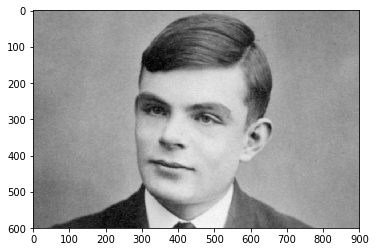

In [ ]:
#Step 5 Generate original image and show it
jpgAfter = open("petitPrinceAfter.jpg","wb")
jpgAfter.write(decrypted) 
jpgAfter.close()
petitPrinceAfter = cv2.imread("petitPrinceAfter.jpg")
plt.imshow(petitPrinceAfter)